In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#  Fit function 
def fit_function(epsilon, T, Delta_E, hbar_omega):                           
    term1 = np.exp(-(epsilon - Delta_E) / T)
    term2 = np.exp((4 * np.pi * Delta_E / hbar_omega) * (np.sqrt(epsilon / Delta_E) - 1))
    term3 = term2 + 1
    return term1 * term2 / term3

# Define the function that generates your example data
def data(x, a, b, c, d):
    return a * (1 - np.exp(-b * x)) * np.exp(-c * x) + d

# Example data (replace these arrays with your actual data)
epsilon_data = np.linspace(0.01, 10, 100)  # Kinetic energy values
distribution_data = data(epsilon_data, 2.5e6, 10, 1, 0)  # Example distribution

In [44]:

p0 = [1, 10, 10]

popt, pcov = curve_fit(
    fit_function, epsilon_data, distribution_data, p0=p0,
    bounds=[
        (0., 0., 0.),
        (np.inf, np.inf, np.inf)
    ]
)



/tmp/ipykernel_5838/3464900117.py:7: RuntimeWarning: overflow encountered in exp
  term1 = np.exp(-(epsilon - Delta_E) / T)


In [47]:
popt2, pcov2 = curve_fit(data, epsilon_data, distribution_data)
popt2

/tmp/ipykernel_5838/3464900117.py:14: RuntimeWarning: overflow encountered in exp
  return a * (1 - np.exp(-b * x)) * np.exp(-c * x) + d


array([2.50000000e+06, 1.00000000e+01, 1.00000000e+00, 6.17671291e-05])

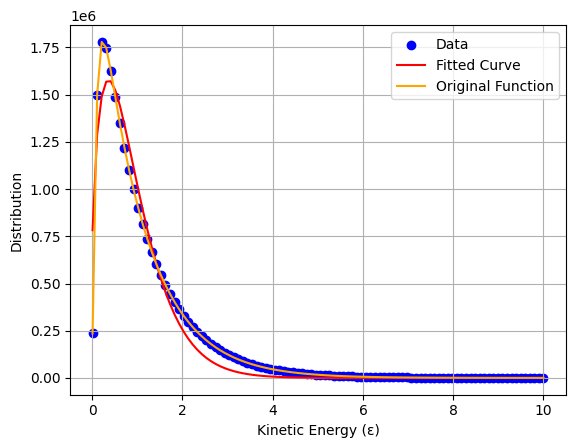

In [48]:

# Plot the comparison of data and fitted curve
fig, axe = plt.subplots()
axe.scatter(epsilon_data, distribution_data, label='Data', color='blue')
axe.plot(epsilon_data, fit_function(epsilon_data, *popt), label='Fitted Curve', color='red')
axe.plot(epsilon_data, data(epsilon_data, *popt2), label="Original Function", color="orange")
axe.set_xlabel('Kinetic Energy (ε)')
axe.set_ylabel('Distribution')
axe.legend()
axe.grid()